<a href="https://colab.research.google.com/github/haldonmez/mnist-digit-recognizer/blob/main/Model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import torch
from torch import nn

import matplotlib.pyplot as plt

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

print(f"Pytorch version: {torch.__version__}\ntorchvision version:{torchvision.__version__}")

Pytorch version: 2.2.1+cu121
torchvision version:0.17.1+cu121


In [34]:
data = "/content/data"
train_data = datasets.MNIST(
    root=data,
    train= True,
    transform=ToTensor(),
    download=True,
    target_transform=None
)

test_data = datasets.MNIST(
    root=data,
    train=False,
    transform=ToTensor(),
    download=True
)

In [35]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(train_data, #Dataset to iterate on for the according batch size.
                              batch_size = BATCH_SIZE, #Size of every single iteration.
                              shuffle = True, #To make the loaded data selecte randomly.
                              )
test_dataloader = DataLoader(test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = True)

print(f"For training data there is {len(train_dataloader)} iterations with the batch size of {BATCH_SIZE}.")
print(f"For testing data there is {len(test_dataloader)} iterations with the batch size of {BATCH_SIZE}.")

For training data there is 1875 iterations with the batch size of 32.
For testing data there is 313 iterations with the batch size of 32.


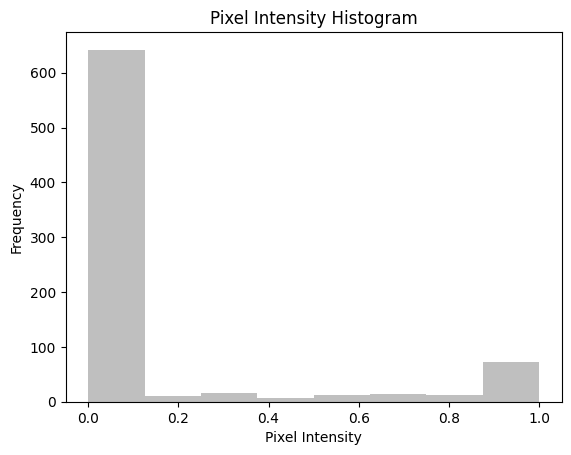

<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

In [84]:
import matplotlib.pyplot as plt
import numpy as numpy

image, label = train_data[0]
flatten_image = nn.Flatten()
image_flattened = flatten_image(image)

plt.hist(image_flattened, bins=8, color='gray', alpha=0.5)
plt.title('Pixel Intensity Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()
total = np.sum(plt.ylabel)
total

In [55]:
image.shape


torch.Size([1, 28, 28])

I will experiment with Otsu's method to try and get a better picture.

In [53]:
import numpy as np

def thresholding(f, L):
    # create a new image with zeros
    f_tr = np.ones(f.shape).astype(np.uint8)
    # setting to 0 the pixels below the threshold
    f_tr[np.where(f < L)] = 0
    return f_tr

In [49]:
import numpy as np

def otsu_threshold(image, max_L):
  M = np.prod(image.shape)
  min_var = []
  hist_t,_ = np.histogram(image, bins=256, range=(0,256))

  img_t = thresholding(image, 0)

  for L in np.arange(1, max_L):
    img_ti = thresholding(image, L)

    w_a = np.sum(hist_t[:L])/float(M)
    w_b = np.sum(hist_t[L:])/float(M)

    sig_a = np.var(image[np.where(img_ti == 0)])
    sig_b = np.var(image[np.where(img_ti == 1)])

    min_var = min_var + [w_a*sig_a + w_b*sig_b]

  img_t = thresholding(image, np.argmin(min_var))

  return img_t, np.argmin(min_var)

In [52]:
#img_o, OL = otsu_threshold(image, 255)

#hist_o,_ = np.histogram(img_o*255, bins=256, range=(0,256))

#plt.figure(figsize=(10,15))
#plt.subplot(325); plt.imshow(img_o, cmap="gray"); plt.axis('off'); plt.title('Otsu threshold (%d)' % (OL))
#plt.subplot(326); plt.bar(np.arange(0,256), hist_o)